In [219]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from collections import defaultdict, Counter
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn import tree, linear_model, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score, fbeta_score
#from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_classification


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler

In [214]:
#Read the dataset
df_acc_all = pd.read_csv('/Users/dona/Documents/DonaRay/DataIncubator/project/Acc.csv')
df_veh_all = pd.read_csv('/Users/dona/Documents/DonaRay/DataIncubator/project/Veh.csv')
df_cas_all = pd.read_csv('/Users/dona/Documents/DonaRay/DataIncubator/project/Cas.csv')


df_cas_freq = df_cas_all.drop(['Age_of_Casualty'], axis=1)
df_cas_classFreq = df_cas_all[['Age_of_Casualty']]




/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Drop columns/rows with missing/nan values
df_acc_sub = df_acc_all.drop(['LSOA_of_Accident_Location', 'Location_Northing_OSGR', 'Location_Easting_OSGR', 'Longitude', 'Latitude'], axis=1)
df_acc = df_acc_sub.dropna()

for date, time in zip(df_acc.Date, df_acc.Time):
  date_obj = datetime.strptime(date, '%d/%m/%Y')
  date = date_obj
  time_obj = datetime.strptime(time, '%H:%M')
  time = time_obj

In [8]:
# Merge Data sets

#Merge Vehicle and Causalty data sets: 
df_veh_cas = pd.merge(df_veh_all, df_cas_all, on=['Accident_Index', 'Vehicle_Reference'], how='left')
df_all = pd.merge(df_acc, df_veh_cas, on='Accident_Index')
df_acc_veh = pd.merge(df_acc, df_veh_all, on='Accident_Index')

print(df_acc_veh.head())
print(df_all.head(20))

  Accident_Index  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  2016010000005             1                  3                   2   
1  2016010000005             1                  3                   2   
2  2016010000006             1                  3                   1   
3  2016010000008             1                  3                   1   
4  2016010000016             1                  3                   1   

   Number_of_Casualties        Date  Day_of_Week   Time  \
0                     1  01/11/2016            3  02:30   
1                     1  01/11/2016            3  02:30   
2                     1  01/11/2016            3  00:37   
3                     1  01/11/2016            3  01:25   
4                     1  01/11/2016            3  09:15   

   Local_Authority_(District) Local_Authority_(Highway)         ...          \
0                          28                 E09000005         ...           
1                          28                 E0

In [5]:
def Print_Stats(df, num):
    #Prints basic summary statistics of a pandas dataframe    

    print(df.head(num))
    print(df.shape)
    print(df.info())
    print(df.columns)
    print(df.describe())


def Print_Frequency(df, bins = []):
    #Prints frequency distribution
    
    col_list = list(df.columns.values)
    
    if bins == []:
        for col in col_list:
            print(df[col].value_counts().sort_index())
    else:
        for col in col_list:
            print(pd.cut(df[col],bins).value_counts().sort_index())

                  

def Plot_features(df, bins = 10):
    #Plots histogram plots of colmns

    col_list = list(df.columns.values)
    #col_names = list(df.columns)
    
    for col in col_list:
        
        df[col].value_counts().sort_index().plot(kind='bar')
        #_ = sns.boxplot(x=col, data=df)
        plt.xlabel(col)
        plt.show()

    



In [22]:
#Printing summary statistics of all variables of the three datasets.
Print_Stats(df_acc_all, 0)
Print_Stats(df_veh_all, 0)
Print_Stats(df_cas_all, 0)
Print_Stats(df_acc_veh, 0)


Empty DataFrame
Columns: [Accident_Index, Location_Easting_OSGR, Location_Northing_OSGR, Longitude, Latitude, Police_Force, Accident_Severity, Number_of_Vehicles, Number_of_Casualties, Date, Day_of_Week, Time, Local_Authority_(District), Local_Authority_(Highway), 1st_Road_Class, 1st_Road_Number, Road_Type, Speed_limit, Junction_Detail, Junction_Control, 2nd_Road_Class, 2nd_Road_Number, Pedestrian_Crossing-Human_Control, Pedestrian_Crossing-Physical_Facilities, Light_Conditions, Weather_Conditions, Road_Surface_Conditions, Special_Conditions_at_Site, Carriageway_Hazards, Urban_or_Rural_Area, Did_Police_Officer_Attend_Scene_of_Accident, LSOA_of_Accident_Location]
Index: []

[0 rows x 32 columns]
(136621, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136621 entries, 0 to 136620
Data columns (total 32 columns):
Accident_Index                                 136621 non-null object
Location_Easting_OSGR                          136614 non-null float64
Location_Northing_OSGR         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252500 entries, 0 to 252499
Data columns (total 23 columns):
Accident_Index                      252500 non-null object
Vehicle_Reference                   252500 non-null int64
Vehicle_Type                        252500 non-null int64
Towing_and_Articulation             252500 non-null int64
Vehicle_Manoeuvre                   252500 non-null int64
Vehicle_Location-Restricted_Lane    252500 non-null int64
Junction_Location                   252500 non-null int64
Skidding_and_Overturning            252500 non-null int64
Hit_Object_in_Carriageway           252500 non-null int64
Vehicle_Leaving_Carriageway         252500 non-null int64
Hit_Object_off_Carriageway          252500 non-null int64
1st_Point_of_Impact                 252500 non-null int64
Was_Vehicle_Left_Hand_Drive?        252500 non-null int64
Journey_Purpose_of_Driver           252500 non-null int64
Sex_of_Driver                       252500 non-null int64
Age_of_Driver     

       Vehicle_Reference  Casualty_Reference  Casualty_Class  Sex_of_Casualty  \
count      181384.000000       181384.000000   181384.000000    181384.000000   
mean            1.490628            1.414386        1.482523         1.406166   
std             0.614679            1.109137        0.713700         0.492866   
min             1.000000            1.000000        1.000000        -1.000000   
25%             1.000000            1.000000        1.000000         1.000000   
50%             1.000000            1.000000        1.000000         1.000000   
75%             2.000000            2.000000        2.000000         2.000000   
max            21.000000           58.000000        3.000000         2.000000   

       Age_of_Casualty  Age_Band_of_Casualty  Casualty_Severity  \
count    181384.000000         181384.000000      181384.000000   
mean         36.333139              6.273497           2.847368   
std          19.259664              2.393541           0.386129   
mi

        Police_Force  Accident_Severity  Number_of_Vehicles  \
count  252431.000000      252431.000000       252431.000000   
mean       29.963047           2.828036            2.121059   
std        24.947021           0.407843            0.857427   
min         1.000000           1.000000            1.000000   
25%         6.000000           3.000000            2.000000   
50%        31.000000           3.000000            2.000000   
75%        45.000000           3.000000            2.000000   
max        98.000000           3.000000           16.000000   

       Number_of_Casualties    Day_of_Week  Local_Authority_(District)  \
count         252431.000000  252431.000000               252431.000000   
mean               1.401967       4.111654                  344.293316   
std                0.889247       1.906554                  255.615079   
min                1.000000       1.000000                    1.000000   
25%                1.000000       3.000000                  10

1      1695
2     21722
3    113165
Name: Accident_Severity, dtype: int64
1     39524
2     82844
3     10960
4      2446
5       517
6       169
7        72
8        26
9        11
10        6
11        4
12        1
13        1
16        1
Name: Number_of_Vehicles, dtype: int64
1     106750
2      20557
3       5954
4       2083
5        771
6        273
7         84
8         42
9         20
10        16
11         5
12        10
13         1
14         3
15         3
16         2
18         1
19         2
21         1
23         1
27         2
58         1
Name: Number_of_Casualties, dtype: int64
1    15020
2    19266
3    20100
4    20863
5    20946
6    22572
7    17815
Name: Day_of_Week, dtype: int64
-1         1
 1      8857
 2      3116
 3     20115
 6    101668
 7      1435
 9      1390
Name: Road_Type, dtype: int64
20.0     6749
30.0    84995
40.0    11450
50.0     5688
60.0    18383
70.0     9317
Name: Speed_limit, dtype: int64
-1      106
 0    56378
 1    11733
 2     170

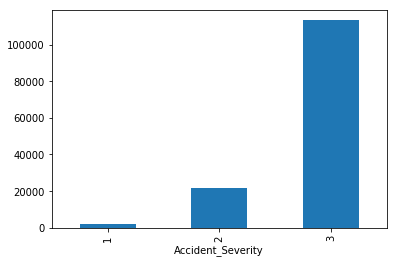

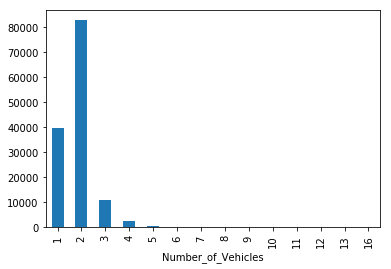

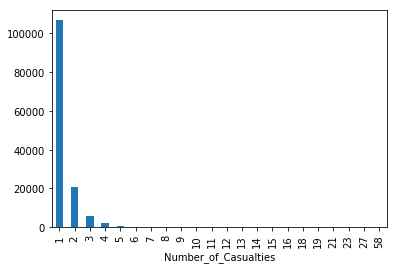

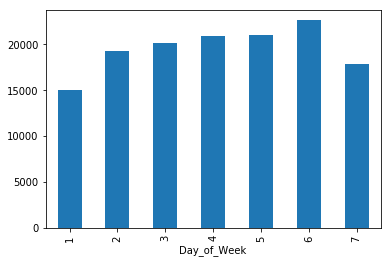

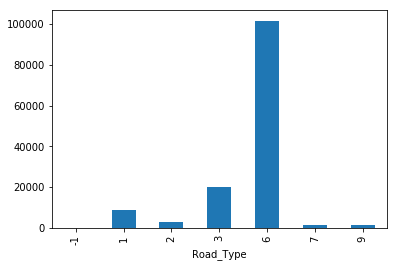

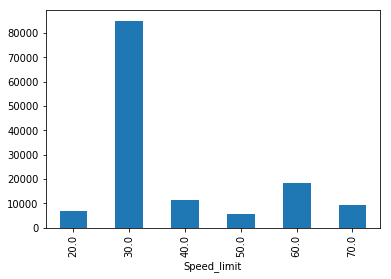

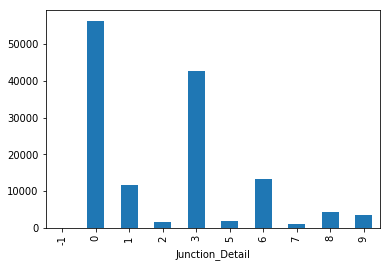

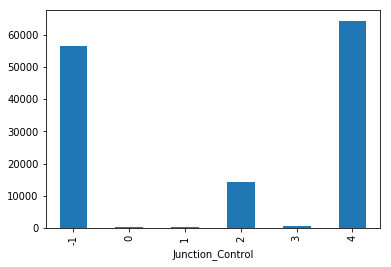

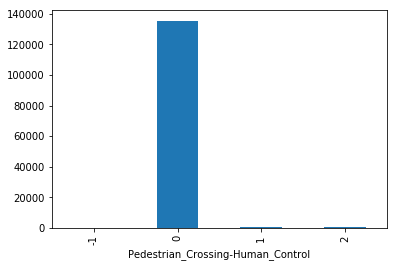

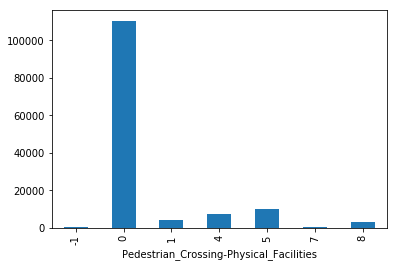

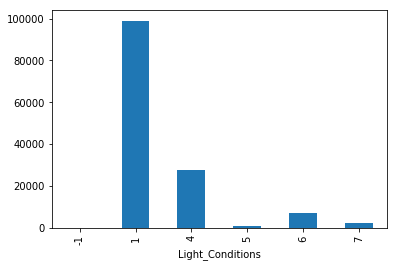

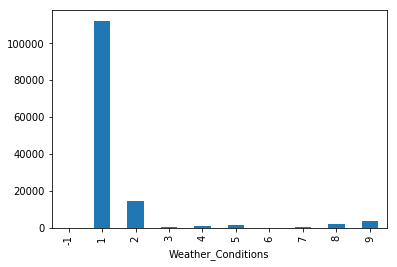

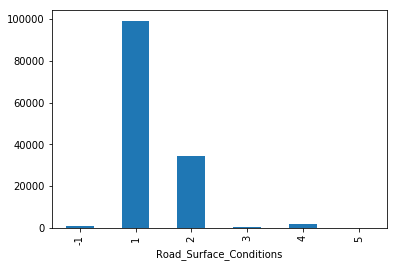

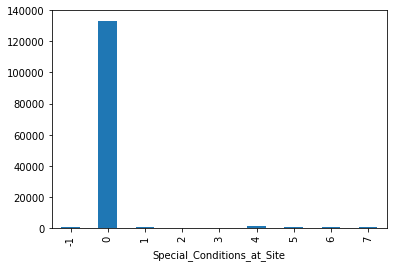

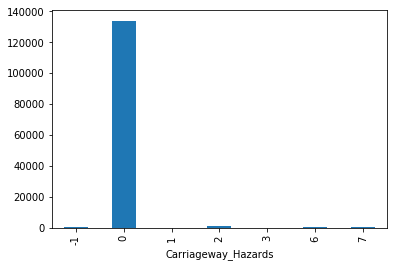

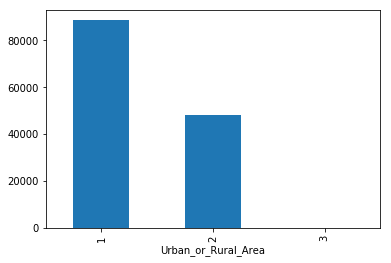

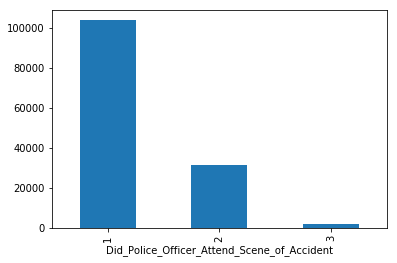

In [19]:
df_acc_freq = df_acc[['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Road_Type', 'Speed_limit', 'Junction_Detail',
                       'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
                        'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
                        'Did_Police_Officer_Attend_Scene_of_Accident']] 

df_veh_freq = df_veh_all[['Vehicle_Reference', 'Towing_and_Articulation', 'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane', 'Junction_Location',
                          'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
                          'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_Band_of_Driver', 'Driver_Home_Area_Type']]


df_cas_freq = df_cas_all[['Casualty_Class', 'Sex_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
                          'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker',
                          'Casualty_Type', 'Casualty_Home_Area_Type']]



#Printing frequency counts of variables
Print_Frequency(df_acc_freq)
#Print_Frequency(df_veh_freq)
#Print_Frequency(df_cas_freq)

#Plot_features(df_cas_freq)
Plot_features(df_acc_freq)
#Plot_features(df_veh_freq)

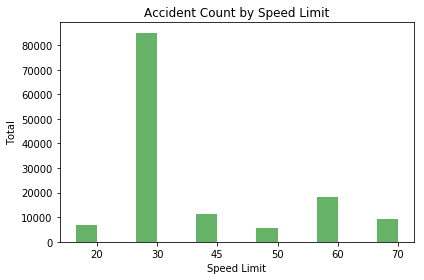

0    56378
1    13433
3    42753
5     1950
6    14116
8     4265
9     3687
dtype: int64


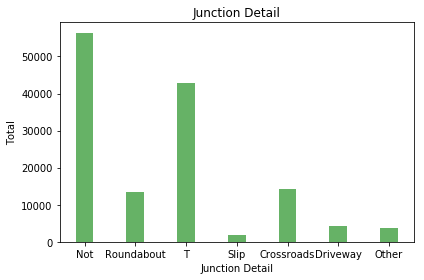

In [162]:
# Creating plots for the Data Story assignment
#Speed Limit
#ax = plt.subplots()

df_temp = df_acc['Speed_limit']

x = df_temp.value_counts().sort_index()

n_groups = 6
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, x, bar_width, label='Speed Limit', alpha=0.6, align='center', color='green')

opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('20', '30', '45', '50', '60','70'))
plt.title('Accident Count by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Total')
plt.tight_layout()
#plt.legend()
fig_speed = plt.gcf()
plt.show()

fig_speed.savefig('Speed.jpeg', bbox_inches='tight')

# Junction Control
#Recreate the bins for this feature
#Junc_detail = df_acc['Junction_Detail']
#x = Junc_control.value_counts()
#x = df_acc['Junction_Detail'].value_counts().sort_index()

Junc_detail = pd.Series(99, np.arange(len(df_acc['Junction_Detail'])))

#print(Junc_detail.value_counts())

j = 0
for _, row in df_acc.iterrows():
    if (row['Junction_Detail'] == 1 or row['Junction_Detail'] == 2): #Roundabout
        Junc_detail[j] = 1
    elif (row['Junction_Detail'] == 6 or row['Junction_Detail'] == 7): #Crossroads, more than 4 arms
        Junc_detail[j] = 6
    elif (row['Junction_Detail'] == 9 or row['Junction_Detail'] == -1):
        Junc_detail[j] = 9   #other, missing
    elif (row['Junction_Detail'] == 3):
        Junc_detail[j] = 3
    elif (row['Junction_Detail'] == 5):
        Junc_detail[j] =5
    elif (row['Junction_Detail'] == 8):
        Junc_detail[j] = 8
    elif (row['Junction_Detail'] == 0):
        Junc_detail[j] = 0
    j += 1
    
#figure.savefig('myplot.png', bbox_inches='tight')    

x = Junc_detail.value_counts().sort_index()
print(x)


n_groups = 7   
index = np.arange(n_groups)
bar_width = 0.35

rect = plt.bar(index, x, bar_width, label='Junction Detail', alpha=0.6, color='green')

plt.xticks(index, ('Not', 'Roundabout', 'T', 'Slip', 'Crossroads','Driveway', 'Other'))
plt.title('Junction Detail')
plt.xlabel('Junction Detail')
plt.ylabel('Total')
plt.tight_layout()
#plt.legend()
fig_junction = plt.gcf()
plt.show()

fig_junction.savefig('Junction.jpeg', bbox_inches='tight')

-1       10
 1    98942
 4    27562
 5      857
 6     7018
 7     2193
Name: Light_Conditions, dtype: int64


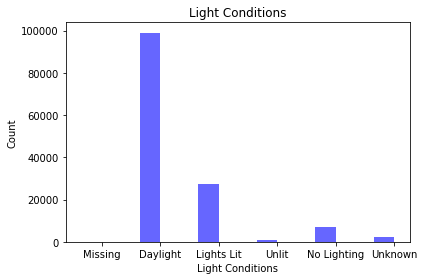

1      112210
2       14836
3        2727
5         745
100      6064
dtype: int64


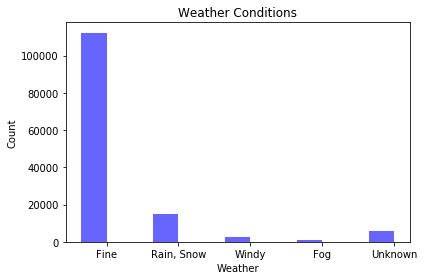

In [191]:
# Bar Charts on Weather and Light Conditions

# Light Conditions
df_light = df_acc['Light_Conditions']
y = df_light.value_counts().sort_index()


print(y)

n_groups = 6
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, y, bar_width, alpha=0.6, color='blue')

opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('Missing', 'Daylight', 'Lights Lit', 'Unlit', 'No Lighting', 'Unknown','70'))
plt.title('Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.tight_layout()
fig_light = plt.gcf()
plt.show()
fig_light.savefig('Light.jpeg', bbox_inches='tight')   

# Weather Conditions

Weather = pd.Series(99, np.arange(len(df_acc['Weather_Conditions'])))

j = 0
for _, row in df_acc.iterrows():
    if (row['Weather_Conditions'] == 1): #Fine
        Weather[j] = 1
    elif (row['Weather_Conditions'] == 2 or row['Weather_Conditions'] == 3): #Rain, snow, no wind
        Weather[j] = 2
    elif (row['Weather_Conditions'] in [4, 5, 6]):
        Weather[j] = 3   #fine, wind or (rain, snow and wind)
    #elif (row['Weather_Conditions'] == 5 or row['Weather_Conditions'] == 6):  #Rain, snow, wind
       # Weather[j] = 4
    elif (row['Weather_Conditions'] == 7): #Fog or mist
        Weather[j] = 5
    #elif (row['Junction_Detail'] == 8):
        #Junc_detail[j] = 8
    else:
        Weather[j] = 100
    j += 1
    
y = Weather.value_counts().sort_index()
print(y)

n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, y, bar_width, alpha=0.6, color='blue')

opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('Fine', 'Rain, Snow', 'Windy', 'Fog', 'Unknown'))
plt.title('Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.tight_layout()
fig_weather = plt.gcf()
plt.show()
fig_weather.savefig('Weather.jpeg', bbox_inches='tight')   


1    15020
2    19266
3    20100
4    20863
5    20946
6    22572
7    17815
Name: Day_of_Week, dtype: int64


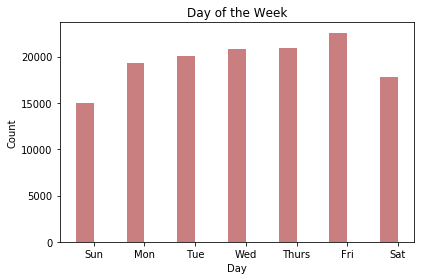

In [182]:
# Day and Time

# Day of the week

df_day = df_acc['Day_of_Week']
y = df_day.value_counts().sort_index()


print(y)

n_groups = 7
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, y, bar_width, alpha=0.6, color='brown')

opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('Sun', 'Mon', 'Tue', 'Wed', 'Thurs', 'Fri','Sat', 'Sun'))
plt.title('Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.tight_layout()
fig_day = plt.gcf()
#plt.legend()
plt.show()
fig_day.savefig('Day.jpeg', bbox_inches='tight')

In [20]:
print(df_acc[['Date', 'Time']].head())

                      Date   Time
Accident_Index                   
2016010000005   01/11/2016  02:30
2016010000006   01/11/2016  00:37
2016010000008   01/11/2016  01:25
2016010000016   01/11/2016  09:15
2016010000018   01/11/2016  07:53


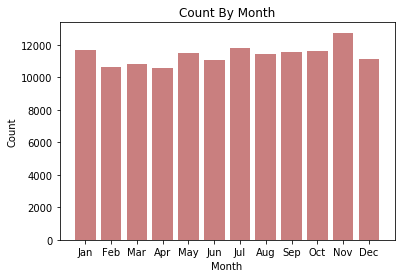

In [181]:
count_by_month = defaultdict(int) 
for _, row in df_acc.iterrows():
    date = datetime.strptime(row['Date'], '%d/%m/%Y')
    count_by_month[date.month] += 1
  
#print(sorted(count_by_month))

#keyList = count_by_month.keys()
y = []
for key in sorted(count_by_month.keys()):
    y.append(count_by_month[key])
    
#x = sorted(count_by_month).values()
keyList = count_by_month.keys()
x = sorted(keyList)


index = range(len(count_by_month))

plt.bar(range(len(count_by_month)), y, align='center', alpha=0.6, color='brown')
plt.xticks(index, ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count By Month')
fig_month = plt.gcf()
plt.show()
fig_month.savefig('Month.jpeg', bbox_inches='tight')   

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


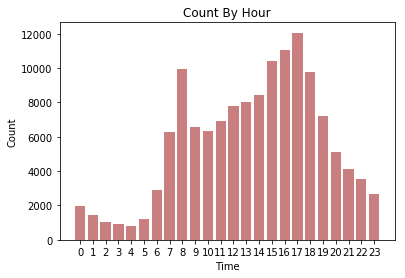

In [183]:
# Time
count_by_hour = defaultdict(int) 
for _, row in df_acc.iterrows():
    time = datetime.strptime(row['Time'], '%H:%M')
    count_by_hour[time.hour] += 1

y = []
for key in sorted(count_by_hour.keys()):
    y.append(count_by_hour[key])
    
#x = sorted(count_by_month).values()
keyList = count_by_hour.keys()
x = sorted(keyList)    
 
print(x)   
index = range(len(count_by_hour))

plt.bar(range(len(count_by_hour)), y, align='center', alpha=0.6, color='brown')
plt.xticks(index, x)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count By Hour')
fig_hour = plt.gcf()
plt.show()
fig_hour.savefig('Hour.jpeg', bbox_inches='tight')       

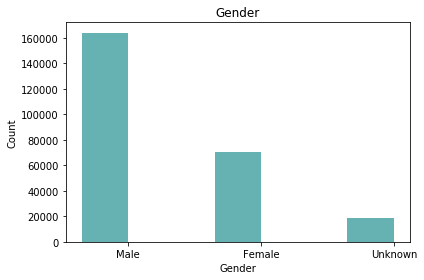

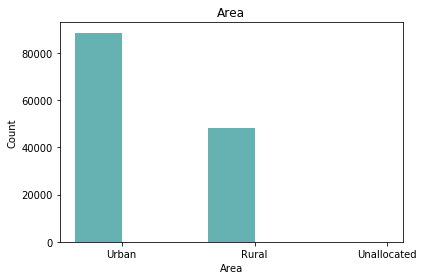

In [178]:
# Demographics
# Gender

df_sex_temp = df_veh_all[df_veh_all['Sex_of_Driver'] > 0]


df_sex = df_sex_temp['Sex_of_Driver']
y = df_sex.value_counts().sort_index()

n_groups = 3
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, y, bar_width, alpha=0.6, color='Teal')

opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('Male', 'Female', 'Unknown'))
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
fig_sex = plt.gcf()
#plt.legend()
plt.show()
fig_sex.savefig('Sex.jpeg', bbox_inches='tight')

#df_area_temp = df_acc[df_acc['Urban_or_Rural_Area'] < 3]

df_urban_rural = df_acc['Urban_or_Rural_Area']
y = df_urban_rural.value_counts().sort_index()

n_groups = 3
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, y, bar_width, alpha=0.6, color='Teal', align='center')

opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('Urban', 'Rural', 'Unallocated'))
plt.title('Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.tight_layout()
fig_area = plt.gcf()
#plt.legend()

plt.show()
fig_area.savefig('Area.jpeg', bbox_inches='tight')

# Look at bar charts by severity of accident



252431
1    134887
2     60969
3     16149
Name: Sex_of_Driver, dtype: int64
1    28928
2     9117
3     2342
Name: Sex_of_Driver, dtype: int64


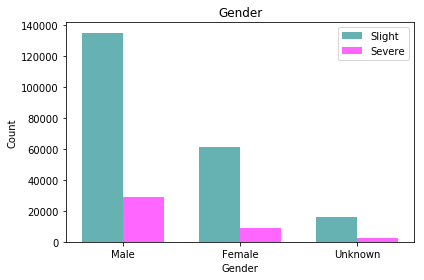

In [189]:
n_records = df_acc_veh['Accident_Severity'].size
print(n_records)

Target_Sev = pd.Series(99, np.arange(n_records))
j = 0
for _, row in df_acc_veh.iterrows():
    if ((row['Accident_Severity'] == 1) or (row['Accident_Severity'] == 2)):
        Target_Sev[j] = 1
    else:
        Target_Sev[j] = 0
    j += 1

    
df_acc_veh['Target_Sev'] = Target_Sev

df_sex_slight = df_acc_veh[df_acc_veh['Target_Sev'] == 0]


df_sex_slight = df_sex_slight[df_sex_slight['Sex_of_Driver'] > 0]
df_sex_slight = df_sex_slight['Sex_of_Driver']
df_sex_severe = df_acc_veh[df_acc_veh['Target_Sev'] == 1]['Sex_of_Driver']

#df_sex_severe_1 = df_acc_veh['Accident_Severity'] == 1 #['Sex_of_Driver']
#df_sex_severe_2 = df_acc_veh['Accident_Severity'] == 2 #['Sex_of_Driver']
#df_sex_severe = df_acc_veh[df_sex_severe_1 or df_sex_severe_2] #['Sex_of_Driver']

y_slight = df_sex_slight.value_counts().sort_index()
y_severe = df_sex_severe.value_counts().sort_index()


print(y_slight)

print(y_severe)

n_groups = 3
index = np.arange(n_groups)
bar_width = 0.35

rects_1 = plt.bar(index, y_slight, bar_width, alpha=0.6, color='Teal')
rects_2 = plt.bar(index + bar_width, y_severe, bar_width, alpha=0.6, color='Magenta')
opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('Male', 'Female', 'Unknown'))
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.legend((rects_1[0], rects_2[0]), ('Slight', 'Severe'))
fig_sex_sev = plt.gcf()
plt.show()
fig_sex_sev.savefig('Sex_sev.jpeg', bbox_inches='tight')   



1    139427
2     72609
3         8
Name: Urban_or_Rural_Area, dtype: int64
1    21381
2    19002
3        4
Name: Urban_or_Rural_Area, dtype: int64


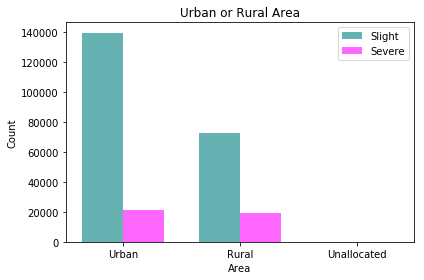

In [188]:
df_area_slight = df_acc_veh[df_acc_veh['Target_Sev'] == 0]['Urban_or_Rural_Area']
df_area_severe = df_acc_veh[df_acc_veh['Target_Sev'] == 1]['Urban_or_Rural_Area']


y_slight = df_area_slight.value_counts().sort_index()
y_severe = df_area_severe.value_counts().sort_index()


print(y_slight)

print(y_severe)

n_groups = 3
index = np.arange(n_groups)
bar_width = 0.35

rects_1 = plt.bar(index, y_slight, bar_width, alpha=0.6, color='Teal')
rects_2 = plt.bar(index + bar_width, y_severe, bar_width, alpha=0.6, color='Magenta')
opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('Urban', 'Rural', 'Unallocated'))
plt.title('Urban or Rural Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.tight_layout()
plt.legend((rects_1[0], rects_2[0]), ('Slight', 'Severe'))
fig_area_sev = plt.gcf()
plt.show()
fig_area_sev.savefig('Area_sev.jpeg', bbox_inches='tight')   



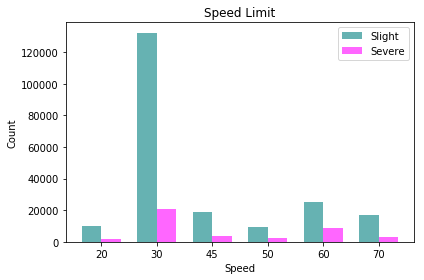

In [185]:
df_speed_slight = df_acc_veh[df_acc_veh['Target_Sev'] == 0]['Speed_limit']
df_speed_severe = df_acc_veh[df_acc_veh['Target_Sev'] == 1]['Speed_limit']


y_slight = df_speed_slight.value_counts().sort_index()
y_severe = df_speed_severe.value_counts().sort_index()


#print(y_slight)

#print(y_severe)

n_groups = 6
index = np.arange(n_groups)
bar_width = 0.35

rects_1 = plt.bar(index, y_slight, bar_width, alpha=0.6, color='Teal')
rects_2 = plt.bar(index + bar_width, y_severe, bar_width, alpha=0.6, color='Magenta')
opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('20', '30', '45', '50', '60','70'))
plt.title('Speed Limit')
plt.xlabel('Speed')
plt.ylabel('Count')
plt.tight_layout()
plt.legend((rects_1[0], rects_2[0]), ('Slight', 'Severe'))
fig_speed_sev = plt.gcf()
plt.show()
fig_speed_sev.savefig('Speed_sev.jpeg', bbox_inches='tight')   


0.0    48069
1.0    11476
3.0    36850
5.0     1669
6.0    12237
8.0     3641
9.0     3164
Name: Junc_detail, dtype: int64
0.0    8309
1.0    1957
3.0    5903
5.0     281
6.0    1879
8.0     624
9.0     523
Name: Junc_detail, dtype: int64


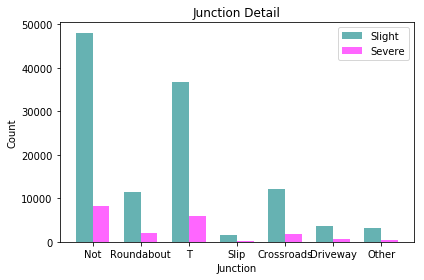

In [186]:
Junc_detail = pd.Series(99, np.arange(len(df_acc['Junction_Detail'])))

j = 0
for _, row in df_acc.iterrows():
    if (row['Junction_Detail'] == 1 or row['Junction_Detail'] == 2): #Roundabout
        Junc_detail[j] = 1
    elif (row['Junction_Detail'] == 6 or row['Junction_Detail'] == 7): #Crossroads, more than 4 arms
        Junc_detail[j] = 6
    elif (row['Junction_Detail'] == 9 or row['Junction_Detail'] == -1):
        Junc_detail[j] = 9   #other, missing
    elif (row['Junction_Detail'] == 3):
        Junc_detail[j] = 3
    elif (row['Junction_Detail'] == 5):
        Junc_detail[j] =5
    elif (row['Junction_Detail'] == 8):
        Junc_detail[j] = 8
    elif (row['Junction_Detail'] == 0):
        Junc_detail[j] = 0
    j += 1
    
 
df_acc_veh['Junc_detail'] = Junc_detail

df_junc_slight = df_acc_veh[df_acc_veh['Target_Sev'] == 0]['Junc_detail']
df_junc_severe = df_acc_veh[df_acc_veh['Target_Sev'] == 1]['Junc_detail']


y_slight = df_junc_slight.value_counts().sort_index()
y_severe = df_junc_severe.value_counts().sort_index()


print(y_slight)

print(y_severe)

n_groups = 7
index = np.arange(n_groups)
bar_width = 0.35

rects_1 = plt.bar(index, y_slight, bar_width, alpha=0.6, color='Teal')
rects_2 = plt.bar(index + bar_width, y_severe, bar_width, alpha=0.6, color='Magenta')
opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('Not', 'Roundabout', 'T', 'Slip', 'Crossroads','Driveway', 'Other'))
plt.title('Junction Detail')
plt.xlabel('Junction')
plt.ylabel('Count')
plt.tight_layout()
plt.legend((rects_1[0], rects_2[0]), ('Slight', 'Severe'))
fig_junction_sev = plt.gcf()
plt.show()
fig_junction_sev.savefig('Junction_sev.jpeg', bbox_inches='tight')


1       2086
2      45606
3      52984
4      42862
5      39159
6      22269
7      18116
100    29418
dtype: int64


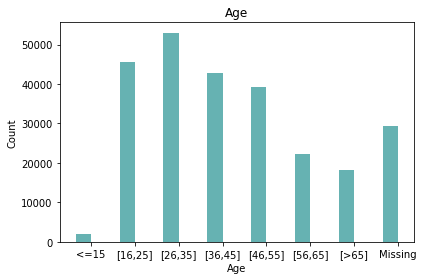

In [179]:
# Age

Age = pd.Series(99, np.arange(len(df_veh_all['Age_Band_of_Driver'])))

j = 0
for _, row in df_veh_all.iterrows():
    if (row['Age_Band_of_Driver'] in [1, 2, 3]): # Age <= 15
        Age[j] = 1
    elif (row['Age_Band_of_Driver'] in [4,5]): # 16 <= Age <= 25
        Age[j] = 2
    elif (row['Age_Band_of_Driver'] == 6): # 26 <= Age <= 35
        Age[j] = 3   
    elif (row['Age_Band_of_Driver'] == 7):  # 36 <= Age <= 45
        Age[j] = 4
    elif (row['Age_Band_of_Driver'] == 8): # 46 <= Age <= 55
        Age[j] = 5
    elif (row['Age_Band_of_Driver'] == 9): # 56 <= Age <= 65
        Age[j] = 6
    elif (row['Age_Band_of_Driver'] in [10,11]): # over 65
        Age[j] = 7
    else:
        Age[j] = 100
    j += 1
    
y = Age.value_counts().sort_index()
print(y)


n_groups = 8
index = np.arange(n_groups)
bar_width = 0.35

rects1 = plt.bar(index, y, bar_width, alpha=0.6, color='Teal')

opacity = 0.4
error_config = {'ecolor': '0.3'}

plt.xticks(index + bar_width/2, ('<=15', '[16,25]', '[26,35]', '[36,45]', '[46,55]', '[56,65]', '[>65]', 'Missing'))
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
fig_age = plt.gcf()
#plt.legend()
plt.show()
fig_age.savefig('Age.jpeg', bbox_inches='tight')


# Modeling

In [10]:
# Define Target Variable

# Number of data points
n_records = df_acc_veh['Accident_Severity'].size
print(n_records)

Target_Sev = pd.Series(99, np.arange(n_records))
Weather_good = pd.Series(0, np.arange(n_records))
Weather_bad = pd.Series(0, np.arange(n_records))
Light_good = pd.Series(0, np.arange(n_records))
Light_bad = pd.Series(0, np.arange(n_records))
Time_hour = pd.Series(-99, np.arange(n_records))
Road_roundabout = pd.Series(0, np.arange(n_records))
Road_single = pd.Series(0, np.arange(n_records))
Road_dual = pd.Series(0, np.arange(n_records))
Road_T = pd.Series(0, np.arange(n_records))
Road_cross = pd.Series(0, np.arange(n_records))
Road_slip = pd.Series(0, np.arange(n_records))
Road_dry = pd.Series(0, np.arange(n_records))
Road_wet = pd.Series(0, np.arange(n_records))
Traffic_control = pd.Series(0, np.arange(n_records))
Traffic_uncontrol = pd.Series(0, np.arange(n_records))
Urban = pd.Series(0, np.arange(n_records))
Rural = pd.Series(0, np.arange(n_records))
Male = pd.Series(0, np.arange(n_records))
Female = pd.Series(0, np.arange(n_records))

j = 0
for _, row in df_acc_veh.iterrows():
    if ((row['Accident_Severity'] == 1) or (row['Accident_Severity'] == 2)):
        Target_Sev[j] = 1
    else:
        Target_Sev[j] = 0
    
    # Define Weather_good, Weather_bad dummy variables
    if (row['Weather_Conditions'] == 1): #Fine
        Weather_good[j] = 1
    elif (row['Weather_Conditions'] == 2 or row['Weather_Conditions'] == 3): #Rain, snow, no wind
        Weather_bad[j] = 1
    elif (row['Weather_Conditions'] == 4):
        Weather_good[j] = 1   #fine, wind
    elif (row['Weather_Conditions'] == 5 or row['Weather_Conditions'] == 6):  #Rain, snow, wind
        Weather_bad[j] = 1
    elif (row['Weather_Conditions'] == 7): #Fog or mist
        Weather_bad[j] = 1
    else:
        Weather_good[j] = 0
        
    # Define Light_good, Light_bad dummy variables
    if (row['Light_Conditions'] == 1 or row['Light_Conditions'] == 4): #Daylight, lit
        Light_good[j] = 1
    elif (row['Light_Conditions'] == 5 or row['Light_Conditions'] == 6) :  #Light unlit, no lightin
        Light_bad[j] = 1
    else:
        Light_good[j] = 0
    
    # Define hour varible
    Time_hour[j] = row['Time'][0-3]
    
    # Define Road_single, Road_dual, Road_roundabout, Road_slip, Road_T, Road_cross dummy variables
    if (row['Road_Type'] == 1 or row['Junction_Detail'] == 1 or row['Junction_Detail'] == 2): #Roundabout
        Road_roundabout[j] =1
    elif (row['Road_Type'] == 2 or row['Road_Type'] == 6): # one way, single carriageway
        Road_single[j] = 1
    elif (row['Road_Type']  == 7 or row['Junction_Detail'] == 5):  # Slip road
        Road_slip = 1
    elif (row['Road_Type'] == 3):  # Dual
        Road_dual[j] = 1
    elif (row['Junction_Detail'] == 3):   #T-section
        Road_T = 1
    elif (row['Junction_Detail'] == 6 or row['Junction_Detail'] == 7):  #Crossraods, more than 4 arms
        Road_cross = 1
    else:
        Road_single[j] = 0
        
        
     # Road Surface Conditions
    if (row['Road_Surface_Conditions'] == 1): # Dry surface
        Road_dry[j] = 1
    elif (row['Road_Type'] in [2,3,4,5] ): # Wet, Damp, Snow, Ice, Frost
        Road_wet[j] = 1
    else:
        Road_dry[j] = 0

    # Control: Auto or uncontrolled
    if (row['Junction_Control'] in [1, 2, 3]):  # Authorized person, auto, stop sign
        Traffic_control[j] = 1
    elif (row['Junction_Control'] == 4):  # Give way or uncontrolled
        Traffic_uncontrol[j] = 1
    else:
        Traffic_control[j] = 0
    
    # Urban and Rural
    if (row['Urban_or_Rural_Area'] == 1): # Urban
        Urban[j] = 1
    elif (row['Urban_or_Rural_Area'] == 2): # Rural
        Rural[j] = 1
    else:
        Urban[j] = 0
    
    # Define Male, Female dummy variables
    if (row['Sex_of_Driver'] == 1): # Male
        Male[j] = 1
    elif (row['Sex_of_Driver'] == 2): # Rural
        Female[j] = 1
    else:
        Male[j] = 0
    
    
    j += 1


252431


In [11]:
# Dummy Variables for Speed Limit    
df_dummy = pd.get_dummies(df_acc_veh['Speed_limit'], prefix='Speed', drop_first=True)
    

# Create pandas dataframe of features from pandas series    
df_features = pd.DataFrame(Weather_good, columns=['Weather_g'])
#df_features['Weather_b'] = Weather_bad
df_features['Light_g'] = Light_good
#df_features['Light_b'] = Light_bad
df_features['Road_single'] = Road_single 
df_features['Road_dual'] = Road_dual    
df_features['Road_T'] = Road_T
df_features['Road_cross'] = Road_cross
#df_features['Road_slip'] = Road_slip
df_features['Road_roundabout'] = Road_roundabout
#df_features['Road_wet'] = Road_wet
df_features['Road_dry'] = Road_dry
df_features['Urban'] = Urban   
#df_features['Rural'] = Rural
df_features['Male'] = Male
#df_features['Female'] = Female

df_exog = pd.concat([df_features, df_dummy], axis =1)
df_exog['Age'] = df_acc_veh['Age_of_Driver']


print(Target_Sev.value_counts())

Print_Stats(df_exog, 0)

0    212044
1     40387
dtype: int64
Empty DataFrame
Columns: [Weather_g, Light_g, Road_single, Road_dual, Road_T, Road_cross, Road_roundabout, Road_dry, Urban, Male, Speed_30.0, Speed_40.0, Speed_50.0, Speed_60.0, Speed_70.0, Age]
Index: []
(252431, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 252431 entries, 0 to 252430
Data columns (total 16 columns):
Weather_g          252431 non-null int64
Light_g            252431 non-null int64
Road_single        252431 non-null int64
Road_dual          252431 non-null int64
Road_T             252431 non-null int64
Road_cross         252431 non-null int64
Road_roundabout    252431 non-null int64
Road_dry           252431 non-null int64
Urban              252431 non-null int64
Male               252431 non-null int64
Speed_30.0         252431 non-null uint8
Speed_40.0         252431 non-null uint8
Speed_50.0         252431 non-null uint8
Speed_60.0         252431 non-null uint8
Speed_70.0         252431 non-null uint8
Age                

In [24]:
# Define Train Test data sets for modeling
#Split the 'features' and Target data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df_1, Target_Sev, test_size = 0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(df_exog, Target_Sev, test_size = 0.2, random_state = 99)

# Show the results of the split
print('Training set has {} samples.'.format(X_train.shape[0]))
print('Testing set has {} samples.'.format(X_test.shape[0]))

Training set has 201944 samples.
Testing set has 50487 samples.


In [200]:
# We balance the data using Sklearn RandomOverSampler

ros = RandomOverSampler(random_state=99)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

print(np.sum(y_resampled))
print(y_resampled.shape[0])

169635
339270


In [155]:
# Define a function to fit and print results

def Model(X_train, y_train, X_test, y_test, classifier):
    reg = classifier.fit(X_train, y_train)
    
    # Compute metrics
    y_pred = reg.predict(X_test)
    score = r2_score(y_test, y_pred)
    score_1 = reg.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
        
    # Print Results
    print('Rsquared: {:.4f}'.format(score_1))
    print('Reg score: {:.4f}'.format(score))
    print('Accuracy score: {:.4f}'.format(accuracy))
    

    # Generate the confusion matrix and classification report
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))

    print('Classification Report')
    print(classification_report(y_test, y_pred))

    return reg



In [201]:
# Instantiate classifiers
clf_GNB = GaussianNB()
clf_KNN = KNeighborsClassifier(n_neighbors=10)
clf_LR = linear_model.LogisticRegression(random_state = 100, class_weight = 'balanced')
clf_DT = tree.DecisionTreeClassifier(min_samples_leaf = 5, max_leaf_nodes = 10000, class_weight = 'balanced')
clf_SVM = svm.SVC(kernel = 'rbf', max_iter = 10000, tol = 0.01)

# Use resampled data to balance the classes
print('Gaussian Naive Bayes')
reg_GNB = Model(X_resampled, y_resampled, X_test, y_test, clf_GNB)

# Use resampled data to balance the classes
print('K Neighbors')
reg_KNN = Model(X_resampled, y_resampled, X_test, y_test, clf_KNN)

print('Logistic Regression')
reg_LR = Model(X_train, y_train, X_test, y_test, clf_LR)

print('Decision Trees')
reg_DT = Model(X_train, y_train, X_test, y_test, clf_DT)

print('SVM')
#reg_SVM = Model(X_train, y_train, X_test, y_test, clf_SVM)

Gaussian Naive Bayes
Rsquared: 0.6927
Reg score: -1.2862
Accuracy score: 0.6927
Confusion Matrix
[[31729 10680]
 [ 4833  3245]]
Classification Report
             precision    recall  f1-score   support

          0       0.87      0.75      0.80     42409
          1       0.23      0.40      0.29      8078

avg / total       0.77      0.69      0.72     50487

K Neighbors
Rsquared: 0.6682
Reg score: -1.4691
Accuracy score: 0.6682
Confusion Matrix
[[30719 11690]
 [ 5064  3014]]
Classification Report
             precision    recall  f1-score   support

          0       0.86      0.72      0.79     42409
          1       0.20      0.37      0.26      8078

avg / total       0.75      0.67      0.70     50487

Logistic Regression
Rsquared: 0.6140
Reg score: -1.8720
Accuracy score: 0.6140
Confusion Matrix
[[26648 15761]
 [ 3727  4351]]
Classification Report
             precision    recall  f1-score   support

          0       0.88      0.63      0.73     42409
          1       0.22 

In [210]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn import grid_search
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.cross_validation import train_test_split, ShuffleSplit

# Initialize the classifier
clf = tree.DecisionTreeClassifier(random_state = 100, class_weight = 'balanced')

# TODO: Create the parameters list you wish to tune
parameters = {'min_samples_leaf': [5, 10, 15, 20, 25, 30],
             "max_leaf_nodes": [2, 5, 15, 20, 25, 30, 35, 50]}
    

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta = 0.5) 

#cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.2, train_size = None, 
                          # random_state = 0)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = grid_search.GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer,
                                    cv = 5) 

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train) #None

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Compute accuracy score using unpotimized and optimized model
accuracy_unoptimized = accuracy_score(y_test, predictions)
accuracy_optimized = accuracy_score(y_test, best_predictions)

# Compute F-score using optimized and unoptimized model
fscore_unoptimized = fbeta_score(y_test, predictions, beta=0.5)
fscore_optimized = fbeta_score(y_test, best_predictions, beta=0.5)

# Print Accuracy and Fscore
print('Unoptimized model\n------')
print('Accuracy score on testing data: {:.4f}'.format(accuracy_unoptimized))
print('F-score on testing data: {:.4f}'.format(fscore_unoptimized))
print("\nOptimized Model\n------")
print('Final accuracy score on the testing data: {:.4f}'.format(accuracy_optimized))
print('Final F-score on the testing data: {:.4f}'.format(fscore_optimized))

Unoptimized model
------
Accuracy score on testing data: 0.6226
F-score on testing data: 0.2349

Optimized Model
------
Final accuracy score on the testing data: 0.6907
Final F-score on the testing data: 0.2536
